# Stochastic Multi-Armed Bandits - Preference Estimation
These examples come from Chapter 2 of [Reinforcement Learning: An Introduction](https://webdocs.cs.ualberta.ca/~sutton/book/the-book.html) by Sutton and Barto (2nd ed. rev: Oct2015)

In [1]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import bandits as bd

Instead of estimating the expected reward from selecting a particular arm, we may only care about the relative preference of one arm to another.


In [2]:
n_arms = 10
bandit = bd.GaussianBandit(n_arms, mu=4)
n_trials = 1000
n_experiments = 500

## Softmax
Preference learning uses a Softmax-based policy, where the action estimates are converted to a probability distribution using the softmax function. This is then sampled to produce the chosen arm.

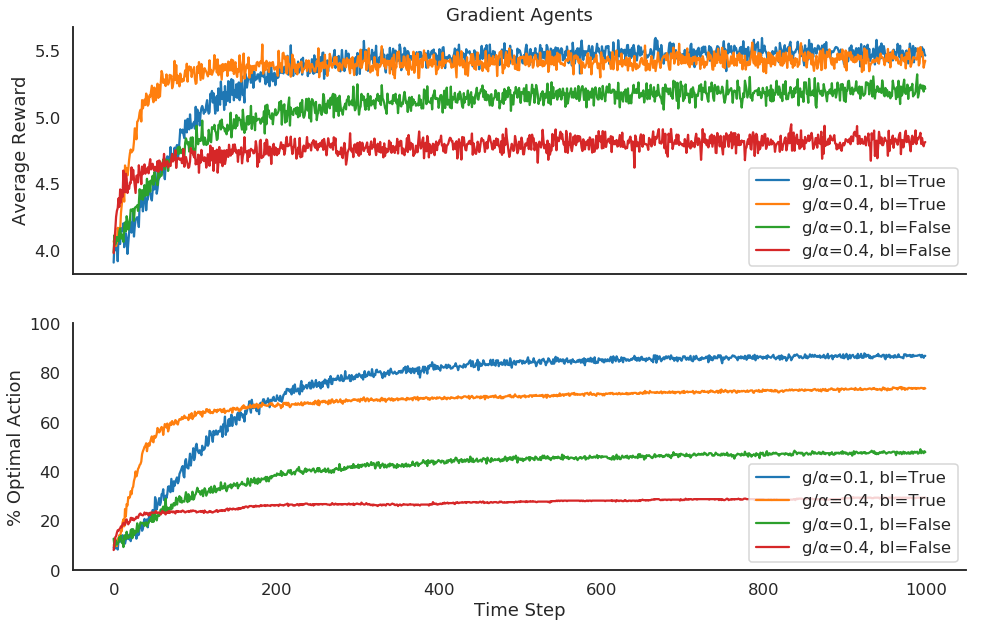

In [3]:
policy = bd.SoftmaxPolicy()
agents = [
    bd.GradientAgent(bandit, policy, alpha=0.1),
    bd.GradientAgent(bandit, policy, alpha=0.4),
    bd.GradientAgent(bandit, policy, alpha=0.1, baseline=False),
    bd.GradientAgent(bandit, policy, alpha=0.4, baseline=False)
]
env = bd.Environment(bandit, agents, 'Gradient Agents')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)